<a href="https://colab.research.google.com/github/yooshin2/Algorithm-Test/blob/main/Trigonometric_with_RNN(failed_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generating Dataset**

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# ====== Generating Dataset ====== #
num_data = 2400
t = np.linspace(0.0, 100.0, num_data)
y = np.sin(t) + np.sin(2*t)
e = np.random.normal(0, 0.1, num_data)
y = y + e

seq_len = 10
X = []
true_y = []
for i in range(len(t) - seq_len):
    X.append(y[i:i+seq_len])
    true_y.append(y[i+seq_len])

X = np.array(X)
true_y = np.array(true_y)

X = np.swapaxes(X,0,1)
X = np.expand_dims(X, axis=2)

# **Model Define**

In [5]:
import torch
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size): 
        super(RNN, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size
         
        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
        self.act = nn.Tanh()
        
        self.hidden = self.init_hidden()
        
    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim)
    
    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)
        return y, h

# **Train Trigonometric Function**

In [6]:
import torch.optim as optim

model = RNN(1, 1, 50, 2390)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
epoch = 100

# ====== Train ====== #

for i in range(epoch):
    model.train()
    model.zero_grad()
    optimizer.zero_grad()
 
    model.hidden = model.init_hidden() 

    for x in X:
        x = torch.Tensor(x).float()
        true_y = torch.Tensor(true_y).float()

        pred_y, hidden = model(x)                 
        model.hidden = hidden
        
    loss = loss_fn(pred_y.view(-1), true_y)
    loss.backward()
    optimizer.step()
    print(loss.item())


1.0363585948944092
0.7776093482971191
0.5884126424789429
0.4502808153629303
0.34960415959358215
0.2763424515724182
0.22309353947639465
0.18441201746463776
0.1563042849302292
0.1358516365289688
0.12092822790145874
0.1099909096956253
0.10192286223173141
0.09591802209615707
0.09139586985111237
0.08793922513723373
0.08524870872497559
0.0831097736954689
0.0813688412308693
0.07991594076156616
0.07867247611284256
0.07758219540119171
0.07660487294197083
0.075711689889431
0.07488199323415756
0.07410097122192383
0.0733579620718956
0.07264526933431625
0.07195734977722168
0.07129012048244476
0.07064063102006912
0.07000670582056046
0.06938669085502625
0.0687793716788292
0.0681837871670723
0.06759920716285706
0.06702505052089691
0.06646083295345306
0.06590615957975388
0.06536069512367249
0.06482414901256561
0.06429625302553177
0.06377676874399185
0.06326549500226974
0.06276220828294754
0.062266744673252106
0.061778903007507324
0.06129853427410126
0.06082545965909958
0.06035952270030975
0.05990057811

(0.0, 200.0)

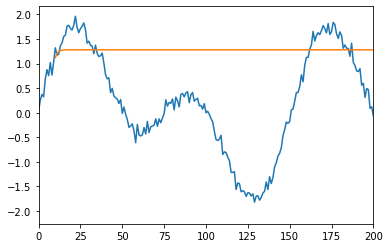

In [12]:
test_X = np.expand_dims(X[:, 0, :], 1)

list_pred_y = []

model.eval()
with torch.no_grad():
    model.hidden = model.init_hidden(batch_size=1) 

    for x in test_X:
        x = torch.Tensor(x).float()
        true_y = torch.Tensor(true_y).float()
        pred_y, hidden = model(x)
        model.hidden = hidden
    list_pred_y.append(pred_y.item())

    for i in range(2389):
        pred_y, hidden = model(pred_y)
        list_pred_y.append(pred_y.item())

plt.plot(y)
plt.plot(list(range(10, 2400)), list_pred_y)
plt.xlim(0, 200)
